In [1]:
%reload_ext jupyter-rdfify

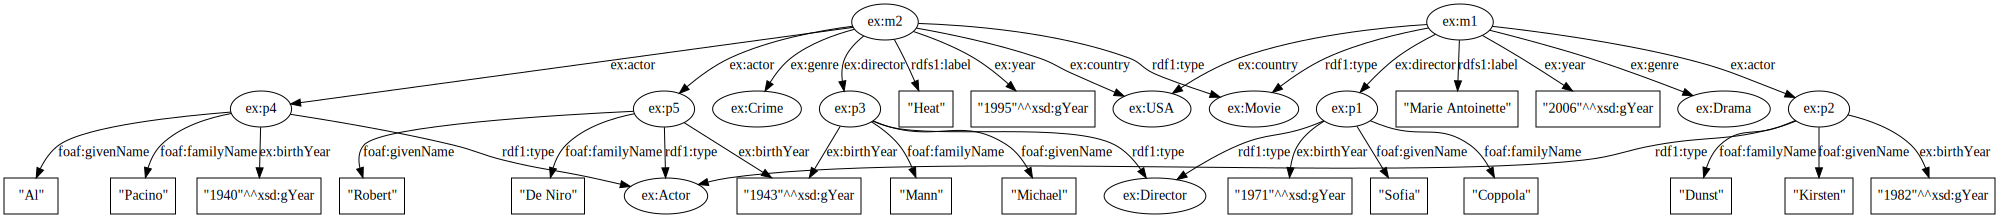

In [2]:
%%rdf turtle --label movies

@prefix ex: <http://example.org/movies/> . 
@prefix rdf: <http://www.w3.org/1999/02/22—rdf—syntax—ns#> . 
@prefix rdfs: <http://www.w3.org/2000/01/rdf—schema#> . 
@prefix foaf: <http://xmlns.com/foaf/0.1/> . 
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:m1 rdf:type ex:Movie;
    ex:genre ex:Drama;
    ex:year "2006"^^xsd:gYear; 
    rdfs:label "Marie Antoinette"; 
    ex:country ex:USA; 
    ex:director ex:p1;
    ex:actor ex:p2 .

ex:p1 rdf:type ex:Director ;
    foaf:familyName "Coppola" ;
    foaf:givenName "Sofia" ;
    ex:birthYear "1971"^^xsd:gYear .

ex:p2 rdf:type ex:Actor ;
    foaf:familyName "Dunst";
    foaf:givenName "Kirsten";
    ex:birthYear "1982"^^xsd:gYear .

ex:p5 rdf:type ex:Actor ;
    foaf:familyName "De Niro";
    foaf:givenName "Robert";
    ex:birthYear "1943"^^xsd:gYear .

ex:m2 rdf:type ex:Movie;
    ex:genre ex:Crime;
    ex:year "1995"^^xsd:gYear;
    rdfs:label "Heat";
    ex:country ex:USA;
    ex:director ex:p3;
    ex:actor ex:p4 , ex:p5.

ex:p3 rdf:type ex:Director ;
    foaf:familyName "Mann";
    foaf:givenName "Michael";
    ex:birthYear "1943"^^xsd:gYear .

ex:p4 rdf:type ex:Actor;
    foaf:familyName "Pacino";
    foaf:givenName "Al";
    ex:birthYear "1940"^^xsd:gYear .

In [3]:
%%rdf sparql --local movies

# Names of all movies.

PREFIX ex: <http://example.org/movies/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf—schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22—rdf—syntax—ns#>
SELECT ?name
WHERE {
    ?movie rdf:type ex:Movie .
    ?movie rdfs:label ?name . 
}

?name
Marie Antoinette
Heat


In [4]:
%%rdf sparql --local movies
# Names of movies and directors sorted descending by the year the movie appeared.
# Names and directors of all movies before 1996.
# Names all movies whose genre is Crime.
# Names of all actors who are above 50 (at 2016).
# Names of all movies whose directors are above 70 (at 2016)

PREFIX ex: <http://example.org/movies/>
PREFIX rdf: <http://www.w3.org/1999/02/22—rdf—syntax—ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf—schema#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?name ?givenname ?familyname ?year
WHERE {
    ?movie rdf:type ex:Movie .
    ?director rdf:type ex:Director .
    
    ?movie ex:director ?director .
    ?movie rdfs:label ?name .

    ?director foaf:givenName ?givenname .
    ?director foaf:familyName ?familyname .
    ?movie ex:year ?year .
}
ORDER BY DESC(?year)

?name,?givenname,?familyname,?year
Marie Antoinette,Sofia,Coppola,2006
Heat,Michael,Mann,1995


In [31]:
%%rdf sparql --local movies
# Names and directors of all movies before 1996.
# Names all movies whose genre is Crime.
# Names of all actors who are above 50 (at 2016).
# Names of all movies whose directors are above 70 (at 2016)

PREFIX ex: <http://example.org/movies/>
PREFIX rdf: <http://www.w3.org/1999/02/22—rdf—syntax—ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf—schema#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?name ?givenname ?familyname ?year
WHERE {
    ?movie rdf:type ex:Movie .
    ?director rdf:type ex:Director .
    
    ?movie ex:director ?director .
    ?movie rdfs:label ?name .

    ?director foaf:givenName ?givenname .
    ?director foaf:familyName ?familyname .
    
    ?movie ex:year ?year .
    BIND(xsd:integer(?year) as ?iYear) .
    
    FILTER ( ?iYear >= "2000"^^xsd:integer )
}

?name,?givenname,?familyname,?year
